# Activation Functions

# 1_1

In [1]:
import numpy as np

In [2]:
class Dense:
    def __init__(self,n_inputs,n_neurons):
        self.w = np.random.uniform(low=-1, high=1, size=(n_inputs,n_neurons))
        self.b = np.random.uniform(low=-1, high=1,size = n_neurons)
    
    def forward(self,inputs):
        self.output = np.dot(inputs,self.w)+self.b

class ReLU:
    def __init__(self):
        pass
    
    def forward(self,inputs):
        self.output = np.maximum(0,inputs)

Layer1 = Dense(4,6)
Act1 = ReLU()

p = np.array([[1, -2, 0, -1]])

Layer1.forward(p)
Act1.forward(Layer1.output)

print('Layer weight = \n', Layer1.w)
print('\nLayer bias = ', Layer1.b)
print('\nnetwork output =',Act1.output)

Layer weight = 
 [[-0.71869251  0.78193047  0.65340988  0.59040434 -0.37442139 -0.35714351]
 [-0.45178631 -0.04615491 -0.15871301  0.73470067 -0.9123897   0.1985869 ]
 [ 0.36645625  0.56039916 -0.31851    -0.53946606  0.81195915 -0.07007568]
 [-0.9076371   0.97167777 -0.77340598 -0.66254335  0.58034357  0.95670452]]

Layer bias =  [ 0.89016413  0.16944894  0.92910691 -0.62172762  0.91032834 -0.1644144 ]

network output = [[1.98268133 0.07201146 2.67334878 0.         1.78034278 0.        ]]


# 1_2

In [3]:
class Dense:
    def __init__(self,n_inputs,n_neurons):
        self.w = np.random.uniform(low=1.5, high=1.5, size=(n_inputs,n_neurons))
        self.b = np.random.uniform(low=1.5, high=1.5,size = n_neurons)
    
    def forward(self,inputs):
        self.output = np.dot(inputs,self.w)+self.b

class Sigmoid:
    def __init__(self):
        pass
    
    def forward(self,inputs):
        self.output = 1.0/(1.0 + np.exp(-inputs))
        
Layer1 = Dense(5,2)
Act1 = ReLU()

Layer2 = Dense(2,4)
Act2 = ReLU()

Layer3 = Dense(4,6)
Act3 = ReLU()

Layer4 = Dense(6,1)
Act4 = Sigmoid()

p = [[-1.2, 3, 0.8, -2, 1]]

Layer1.forward(p)
Act1.forward(Layer1.output)

Layer2.forward(Act1.output)
Act2.forward(Layer2.output)

Layer3.forward(Act2.output)
Act3.forward(Layer3.output)

Layer4.forward(Act3.output)
Act4.forward(Layer4.output)

print("network output =",Act4.output)

network output = [[1.]]


# 1_3

In [4]:
class Dense1:
    def __init__(self,n_inputs,n_neurons):
        self.w = np.random.uniform(low = -1, high = 1, size = (n_inputs,n_neurons))
        self.w[0][1] = 0
        self.b = np.random.uniform(low = -1, high = 1, size = n_neurons)
    
    def forward(self,inputs):
        self.output = np.dot(inputs,self.w)+self.b

class Dense2:
    def __init__(self,n_inputs,n_neurons):
        self.w = np.random.uniform(low = -1, high = 1, size = (n_inputs,n_neurons))
        self.w[0][1] = 0
        self.w[1][0] = 0
        self.b = np.random.uniform(low = -1, high = 1, size = n_neurons)
    
    def forward(self,inputs):
        self.output = np.dot(inputs,self.w)+self.b
               
Layer1 = Dense1(3,2)
Act1 = ReLU()

Layer2 = Dense2(2,3)
Act2 = ReLU()

p1 = [1, -1, 2]
p2 = [-2, 3, 0]


Layer1.forward(p1)
Act1.forward(Layer1.output)
Layer2.forward(Act1.output)
Act2.forward(Layer2.output)
print("network output for p1 =",Act2.output)

Layer1.forward(p2)
Act1.forward(Layer1.output)
Layer2.forward(Act1.output)
Act2.forward(Layer2.output)
print("network output for p2 =",Act2.output)

network output for p1 = [0.72432796 0.45883846 0.76284843]
network output for p2 = [0.72432796 0.45883846 0.76284843]


# 1_4

In [5]:
class Leaky_ReLU:
    def __init__(self):
        pass
    
    def forward(self,inputs):
            if 0 <= inputs:
                self.output = inputs
            else:
                self.output = 0.01*inputs

Act =  Leaky_ReLU()
Act.forward(0.5)
print("Leaky_ReLU(0.5) =",Act.output)

Act.forward(- 0.5)
print("Leaky_ReLU(-0.5) =",Act.output)


class GeLU:
    def __init__(self):
        pass
    
    def forward(self,inputs):
        self.output = 0.5*inputs*(1+np.tanh(((2/np.pi)**(1/2))*(inputs+ 0.044715*(inputs**3))))

Act =  GeLU()
Act.forward(0.5)
print("GeLU(0.5) =",Act.output)

Act.forward(- 0.5)
print("GeLU(-0.5) =",Act.output)

Leaky_ReLU(0.5) = 0.5
Leaky_ReLU(-0.5) = -0.005
GeLU(0.5) = 0.34571400982514394
GeLU(-0.5) = -0.15428599017485606


# picture of GeLU

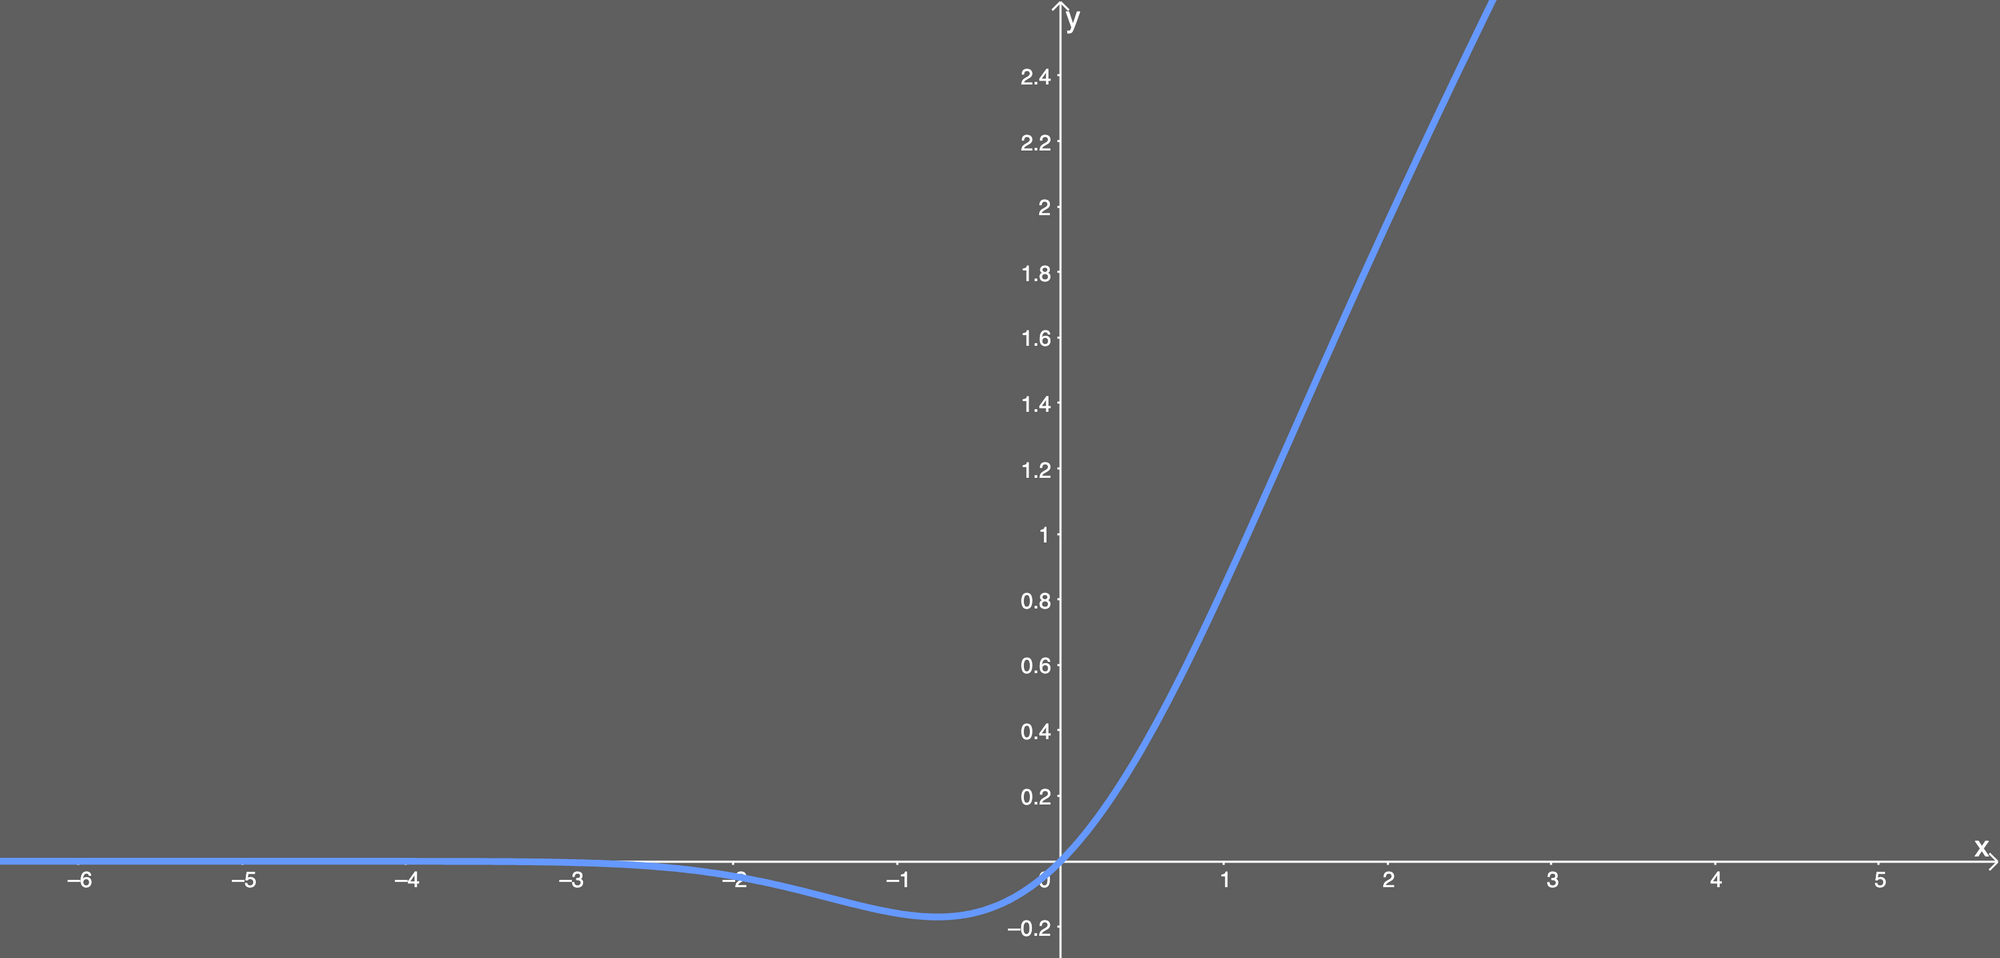

# picture of Leaky_ReLU

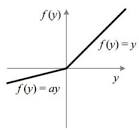

# 1_5

In [6]:
class Tanh:
    def __init__(self):
        pass
    
    def forward(self,inputs):
        self.output = np.tanh(inputs)        

class UnitStep:
     def __init__(self):
        pass
     def forward(self,inputs):
        self.output=np.heaviside(inputs,0)

class Dense1:
    def __init__(self,n_inputs,n_neurons):
        self.w = np.random.uniform(low = 1, high = 1, size = (n_inputs,n_neurons))
        self.b = np.random.uniform(low = 0.5, high = 0.5, size = n_neurons)
    
    def forward(self,inputs):
        out = np.dot(inputs,self.w)+self.b
        
        Act1 = ReLU()
        Act2 = Sigmoid()
        Act3 = UnitStep()
        Act4 = Tanh()
        
        Act1.forward(out[0][0])
        Act2.forward(out[0][1])
        Act3.forward(out[0][2])
        Act4.forward(out[0][3])
        
        out[0][0] = Act1.output
        out[0][1] = Act2.output
        out[0][2] = Act3.output
        out[0][3] = Act4.output

        self.output = out

class Dense2:
    def __init__(self,n_inputs,n_neurons):
        self.w = np.random.uniform(low = -1, high = -1, size = (n_inputs,n_neurons))
        self.b = np.random.uniform(low = 0.5, high = 0.5, size = n_neurons)
    
    def forward(self,inputs):
        self.output = np.dot(inputs,self.w)+self.b
        
Layer1 = Dense1(2,4)
Layer2 = Dense2(4,3)
Act2 = ReLU()

p = [[[-1, 1]], [[0, 11]],[[10, -2]],[[2, -5]],[[0, 0]],[[4, 3]]]

for i in range(len(p)):
    Layer1.forward(p[i])
    print("ntework output for p"+str(i+1)+':')
    Layer2.forward(Layer1.output)
    Act2.forward(Layer2.output)
    print(Act2.output)

ntework output for p1:
[[0. 0. 0.]]
ntework output for p2:
[[0. 0. 0.]]
ntework output for p3:
[[0. 0. 0.]]
ntework output for p4:
[[1.41075612 1.41075612 1.41075612]]
ntework output for p5:
[[0. 0. 0.]]
ntework output for p6:
[[0. 0. 0.]]


# 1_6

In [7]:
class Dense:
    def __init__(self,n_inputs,n_neurons):
        self.w = np.random.normal(0, 1, size=(n_inputs,n_neurons))
        self.b = np.random.uniform(low=0, high=0,size = n_neurons)
    
    def forward(self,inputs):
        self.output = np.dot(inputs,self.w)+self.b

class Linear:
    def __init__(self):
        pass
    
    def forward(self,inputs):
        self.output = inputs

Layer1 = Dense(3,12)
Act1 = Linear()

Layer2 = Dense(12,4)
Act2 = Tanh()


p = [[-1.2, 3, 4]]

Layer1.forward(p)
Act1.forward(Layer1.output)

Layer2.forward(Act1.output)
Act2.forward(Layer2.output)
print("Layer2 output = ",Layer2.output)
print("network output = ",Act2.output)

Layer2 output =  [[20.01166718 -6.20597296 -8.97847078  7.17450625]]
network output =  [[ 1.         -0.99999186 -0.99999997  0.99999883]]


# if we use linear activation function in hidden layer

In [8]:
p = [[-1.2, 3, 4]]

Act2 = Linear()

Layer3 = Dense(4,4)
Act3 = Tanh()

Layer1.forward(p)
Act1.forward(Layer1.output)

Layer2.forward(Act1.output)
Act2.forward(Layer2.output)

print("Layer2 Output =",Layer2.output)
print("Act2 Output =",Act2.output)

Layer3.forward(Act2.output)
print("Layer3 Output =",Layer3.output)

Act3.forward(Layer3.output)
print("Network Output =",Act3.output)

Layer2 Output = [[20.01166718 -6.20597296 -8.97847078  7.17450625]]
Act2 Output = [[20.01166718 -6.20597296 -8.97847078  7.17450625]]
Layer3 Output = [[-33.10853988  21.22662004  31.89930266 -13.72056951]]
Network Output = [[-1.  1.  1. -1.]]


# if we use ReLU activation function in hidden layer

In [9]:
Act2 = ReLU()

Layer1.forward(p)
Act1.forward(Layer1.output)

Layer2.forward(Act1.output)
Act2.forward(Layer2.output)

print("Layer2 Output =",Layer2.output)
print("Act2 Output =",Act2.output)

Layer3.forward(Act2.output)
print("Layer3 Output =",Layer3.output)

Act3.forward(Layer3.output)


print("Network Output =",Act3.output)

Layer2 Output = [[20.01166718 -6.20597296 -8.97847078  7.17450625]]
Act2 Output = [[20.01166718  0.          0.          7.17450625]]
Layer3 Output = [[-16.19342175  25.55109502  43.11475333  -0.17519969]]
Network Output = [[-1.          1.          1.         -0.17342885]]


Adding the hidden layer changed the network output. Changes in calculations in the network caused change in the network output.  

After using ReLU in the hidden layer some of the neuron outputs will be zero in Layer2, so they will not participate in the final answer(it is like deleting some neurons), while when act func was linear all of neurons participate to the final answer. And the difference in network output in these two state happened because of this fact.

In a nutshell, the network output in these three problems is different. From above three runned programs, it is obvious what happend(different calculation) in the network is the reason of difference in network output.

# Classification

# 2_1

# 2_1_a

In [10]:
#A: y = 0.33*x +2
#B: y = -x+6
#C: x=1

# 2_1_b

In [11]:
'''
bias for A: 2
bias for B: 6
bias for C: 0

weight for A: 0.33
weight for B: -1
weight for C: 0
'''

'\nbias for A: 2\nbias for B: 6\nbias for C: 0\n\nweight for A: 0.33\nweight for B: -1\nweight for C: 0\n'

# 2_1_c

In [12]:
class UnitStep:
     def __init__(self):
        pass
     def forward(self,inputs):
        self.output=np.heaviside(inputs,0)
            
class Dense:
    def __init__(self):
        self.w = ([[-1/3,1,1],[1,1,0]])
        self.b = [-2,-6,-1]
    def forward(self,inputs):
        self.output = np.dot(inputs,self.w)+self.b
        
Layer = Dense()
p = np.array([2, 0])
Act = UnitStep()
Layer.forward(p)
Act.forward(Layer.output)
print(Act.output)



[0. 0. 1.]


your prediction was true and the network output is equivalent to predicted output in NNHW1 file.

# 2_1_d

هر سه خط باید از یک نقطه بگذرند تا هشت منطقه تشکیل شود اما چون این سه خط از یک نقطه نمی گذرند و به جای یک نقطه برخورد، سه نقطه برخورد دارند این اتفاق افتاده است

اگر نقطه برخورد آ و سی  بالا تر از خط بی بود، آنگاه دسته بندی 0و1و0 اتفاق می افتاد. ولی 1و0و1 هرگز اتفاق نمی افتاد مگر اینکه سه خط آ و بی و سی همزمان از یک نقطه می گذشتند

# 2_2

In [13]:
class Dense:
    def __init__(self,n_inputs,n_neurons):
        self.w = np.random.normal(0, 1, size=(n_inputs,n_neurons))
        self.b = np.random.normal(0, 1, size= n_neurons)
    
    def forward(self,inputs):
        self.output = np.dot(inputs,self.w)+self.b

    
Layer1 = Dense(3,2)
Layer2 = Dense(2,1)
Act2 = Sigmoid()

p = [[[0, 0, 0]],[[-1, 1, 2]], [[2, 0, -1]], [[-1, -1, 1]]]

for i in range(4):
    if i==0:
        print("for activation function1 relu:")
        Act1 = ReLU()
        
    if i==1:
        print("for activation function1 Tanh:")
        Act1 = Tanh()
        
    if i==2:
        print("for activation function1 Sigmoid:")
        Act1 = Sigmoid()
        
    if i==3:
        print("for activation function1 Linear:")
        Act1 = Linear()
        
    for j in range(len(p)):
        Layer1.forward(p[j])
        Act1.forward(Layer1.output)
        Layer2.forward(Act1.output)
        Act2.forward(Layer2.output)
        print("network outcome for p"+str(j)+'= ',Act2.output)
        if Act2.output>= 0.5:
            print(str(p[j])+" belongs to class = 1")
        else:
            print(str(p[j])+" belongs to class = 0")
    print("\n")
        

 

for activation function1 relu:
network outcome for p0=  [[0.00037936]]
[[0, 0, 0]] belongs to class = 0
network outcome for p1=  [[0.00012612]]
[[-1, 1, 2]] belongs to class = 0
network outcome for p2=  [[0.0025803]]
[[2, 0, -1]] belongs to class = 0
network outcome for p3=  [[0.00032717]]
[[-1, -1, 1]] belongs to class = 0


for activation function1 Tanh:
network outcome for p0=  [[0.0335843]]
[[0, 0, 0]] belongs to class = 0
network outcome for p1=  [[0.04370766]]
[[-1, 1, 2]] belongs to class = 0
network outcome for p2=  [[0.05237213]]
[[2, 0, -1]] belongs to class = 0
network outcome for p3=  [[0.04294306]]
[[-1, -1, 1]] belongs to class = 0


for activation function1 Sigmoid:
network outcome for p0=  [[0.03864463]]
[[0, 0, 0]] belongs to class = 0
network outcome for p1=  [[0.0444278]]
[[-1, 1, 2]] belongs to class = 0
network outcome for p2=  [[0.05288261]]
[[2, 0, -1]] belongs to class = 0
network outcome for p3=  [[0.04467466]]
[[-1, -1, 1]] belongs to class = 0


for activatio

# 2_3

In [14]:
Act2 = UnitStep()

for i in range(4):
    if i==0:
        print("for activation function1 relu:")
        Act1 = ReLU()
        
    if i==1:
        print("for activation function1 Tanh:")
        Act1 = Tanh()
        
    if i==2:
        print("for activation function1 Sigmoid:")
        Act1 = Sigmoid()
        
    if i==3:
        print("for activation function1 Linear:")
        Act1 = Linear()
        

    for j in range(len(p)):
        Layer1.forward(p[j])
        Act1.forward(Layer1.output)
        Layer2.forward(Act1.output)
        Act2.forward(Layer2.output)
        if Act2.output>= 0.5:
            print(str(p[j])+" belongs to class = 1")
        else:
            print(str(p[j])+" belongs to class = 0")
    print('\n')

for activation function1 relu:
[[0, 0, 0]] belongs to class = 0
[[-1, 1, 2]] belongs to class = 0
[[2, 0, -1]] belongs to class = 0
[[-1, -1, 1]] belongs to class = 0


for activation function1 Tanh:
[[0, 0, 0]] belongs to class = 0
[[-1, 1, 2]] belongs to class = 0
[[2, 0, -1]] belongs to class = 0
[[-1, -1, 1]] belongs to class = 0


for activation function1 Sigmoid:
[[0, 0, 0]] belongs to class = 0
[[-1, 1, 2]] belongs to class = 0
[[2, 0, -1]] belongs to class = 0
[[-1, -1, 1]] belongs to class = 0


for activation function1 Linear:
[[0, 0, 0]] belongs to class = 0
[[-1, 1, 2]] belongs to class = 0
[[2, 0, -1]] belongs to class = 0
[[-1, -1, 1]] belongs to class = 0




# 2_4

In [15]:
class Dense1:
    def __init__(self,n_inputs,n_neurons):
        self.w = np.random.randn(n_inputs,n_neurons)
        self.b = np.random.randn(n_neurons)
    
    def forward(self,inputs):
        self.output = np.dot(inputs,self.w)+self.b

class Softmax:
    def __init__(self):
        pass
    def forward(self,inputs):
        neuron_output = np.exp(inputs-np.max(inputs,axis=1,keepdims=True))
        self.output = neuron_output/np.sum(neuron_output,axis = 1,keepdims=True)
    
               
Layer1 = Dense(3,2)
Layer2 = Dense1(2,2)
Act2 = Softmax()

for i in range(4):
    if i==0:
        print("for activation function1 relu:")
        Act1 = ReLU()
        
    if i==1:
        print("for activation function1 Tanh:")
        Act1 = Tanh()
        
    if i==2:
        print("for activation function1 Sigmoid:")
        Act1 = Sigmoid()
        
    if i==3:
        print("for activation function1 Linear:")
        Act1 = Linear()
        

    for j in range(len(p)):
        Layer1.forward(p[j])
        Act1.forward(Layer1.output)
        Layer2.forward(Act1.output)
        Act2.forward(Layer2.output)
        print("network outcome for p"+str(j)+'= ',Act2.output)
        for k in Act2.output:
            data = []
            if k[0]>= 0.5:
                data.append(1)
            else:
                data.append(0)
                
            if k[1]>= 0.5:
                data.append(1)
            else:
                data.append(0)
            print("The classification result =",data)
    
    print('\n')

for activation function1 relu:
network outcome for p0=  [[0.88753099 0.11246901]]
The classification result = [1, 0]
network outcome for p1=  [[0.89633229 0.10366771]]
The classification result = [1, 0]
network outcome for p2=  [[0.95608459 0.04391541]]
The classification result = [1, 0]
network outcome for p3=  [[0.88753099 0.11246901]]
The classification result = [1, 0]


for activation function1 Tanh:
network outcome for p0=  [[0.42707843 0.57292157]]
The classification result = [0, 1]
network outcome for p1=  [[0.63905211 0.36094789]]
The classification result = [1, 0]
network outcome for p2=  [[0.95500796 0.04499204]]
The classification result = [1, 0]
network outcome for p3=  [[0.25558544 0.74441456]]
The classification result = [0, 1]


for activation function1 Sigmoid:
network outcome for p0=  [[0.96067025 0.03932975]]
The classification result = [1, 0]
network outcome for p1=  [[0.96170712 0.03829288]]
The classification result = [1, 0]
network outcome for p2=  [[0.9847808 0.0

# 2_5

In [16]:
class Dense:
    def __init__(self,n_inputs,n_neurons):
        self.w = np.random.uniform(-4, 4, size=(n_inputs,n_neurons))
        self.b =  np.random.uniform(-4, 4, size= n_neurons)
    
    def forward(self,inputs):
        self.output = np.dot(inputs,self.w)+self.b
            
Layer1 = Dense(2,4)
Act1 = ReLU()

Layer2 = Dense(4,3)
Act2 = Softmax()

p = [[[-1, 1]],[[-1, 0]],[[0, 2]],[[1, 2]],[[2, 0]],[[2, 1]]]
t = [0,0,1,1,2,2]
pred = []

for i in p:
    Layer1.forward(i)
    Act1.forward(Layer1.output)
    Layer2.forward(Act1.output)
    Act2.forward(Layer2.output)
    print("network outcome for",i,'=',Act2.output)
    predict = []
    for j in range(len(Act2.output[0])):
        if np.max(Act2.output[0]) == Act2.output[0][j]:
            predict.append(j)
    pred.append(predict[0])
    print("predicted classification =",predict[0])

c = 0
for i in range(6):
    if pred[i] == t[i]:
        c = c+1
print("accuracy =",c/6)

network outcome for [[-1, 1]] = [[8.31014491e-10 2.25458640e-07 9.99999774e-01]]
predicted classification = 2
network outcome for [[-1, 0]] = [[9.02707302e-07 1.05185360e-03 9.98947244e-01]]
predicted classification = 2
network outcome for [[0, 2]] = [[8.78228548e-07 1.62667405e-08 9.99999106e-01]]
predicted classification = 2
network outcome for [[1, 2]] = [[2.32930248e-03 2.03816804e-05 9.97650316e-01]]
predicted classification = 2
network outcome for [[2, 0]] = [[9.99919952e-01 6.04201635e-07 7.94441279e-05]]
predicted classification = 0
network outcome for [[2, 1]] = [[9.84398297e-01 1.27031964e-04 1.54746710e-02]]
predicted classification = 0
accuracy = 0.0


# 2_6

UnitStep:
If we use UnitStep as our last activation function for inputs less than 0 the output would be 0 and otherwise this would be one.
This function is better to be used for classifying two categories and not more because it has only two output values.

Softmax:
If we use Softmax as our last activation function for different inputs the output would be an amout between 0 and 1 and it can be even 0.145897.


Differences:

output: UnitStep_output = {0,1} and Softmsx_output = a number in range [0,1]
Usage: UnitStep = classifying two classes, Softmax = classifying more than two classes
Why softmax is preferred in output layer: because it can classify more than two classes

more explanation:
The most important difference is that softmax is preferred in the output layer of deep learning models, especially when it is necessary to classify more than two.It allows determining the probability that the input belongs to a particular class by producing values in the range [0-1]. So it performs a probabilistic interpretation.

In a nutshell for classifying multiclasses UnitStep is useless if we want to just have one neurons in output, in this situation softmax can work really good. but if number of neuron in output is better to be equal to numbr of classes or at least n_out_neuron = log( classes_num,2). To avoid these troubles you can just have a single neuron with softmax function at your network output and simply classsify datd even into 1000 classes. 



# Perceptron Learning Rule 

# 3_1

In [17]:
class Dense:
    def __init__(self,n_inputs,n_neurons):
        self.w = np.random.uniform(10, 10, size=(n_inputs,n_neurons))
        self.b = np.random.uniform(10, 10, size= n_neurons)
    
    def forward(self,inputs):
        self.output = np.dot(inputs,self.w)+self.b
        
Layer1 = Dense(2,1)
Act1 = UnitStep()

p = np.array([[1,4],[1,5],[2,4],[2,5],[3,1],[3,2],[4,1],[4,2]])
t = np.array([0,0,0,0,1,1,1,1])

epoch = 5
c = 0

print("weights:")
print(Layer1.w)
print("biases:")
print(Layer1.b) 

for i in range(epoch):
    L = []
    for j in range(len(t)):
        k = []
        
        Layer1.forward(p[j])
        Act1.forward(Layer1.output)
       
        e = t[j] - Act1.output
        e = np.array(e)
        
        k.insert(0,e*p[j][0])
        k.insert(1,e*p[j][1])

        Layer1.w = Layer1.w + k
        Layer1.b = Layer1.b + e
       
        L.append(Act1.output)
        
    print("weights in epoch:",i)
    print(Layer1.w)
    print("biases in epoch:",i)
    print(Layer1.b)

    c = 0
    L = np.array(L)
    

    for f in range(len(t)):
        if L[f]==t[f]:
            c = c+1
            
    print("Accuracy in epoch",i,'=',c/8*100,'\n')


weights:
[[10.]
 [10.]]
biases:
[10.]
weights in epoch: 0
[[ 4.]
 [-8.]]
biases in epoch: 0
[6.]
Accuracy in epoch 0 = 50.0 

weights in epoch: 1
[[ 4.]
 [-8.]]
biases in epoch: 1
[6.]
Accuracy in epoch 1 = 100.0 

weights in epoch: 2
[[ 4.]
 [-8.]]
biases in epoch: 2
[6.]
Accuracy in epoch 2 = 100.0 

weights in epoch: 3
[[ 4.]
 [-8.]]
biases in epoch: 3
[6.]
Accuracy in epoch 3 = 100.0 

weights in epoch: 4
[[ 4.]
 [-8.]]
biases in epoch: 4
[6.]
Accuracy in epoch 4 = 100.0 



# In epoch 1 accuracy reached 100%. So just 1 epoch is enough.

# 3_2

In [18]:
class Dense:
    def __init__(self,n_inputs,n_neurons):
        self.w = np.random.uniform(0, 10, size=(n_inputs,n_neurons))
        self.b = np.random.uniform(0, 10, size= n_neurons)
    
    def forward(self,inputs):
        self.output = np.dot(inputs,self.w)+self.b

class Softmax:
    def __init__(self):
        pass
    def forward(self,inputs):
        neuron_output = np.exp(inputs-np.max(inputs,keepdims=True))
        self.output = neuron_output/np.sum(neuron_output,keepdims=True)



Layer1 = Dense(2,4)
Act1 = Softmax()


p = [[-1,1],[-1,0],[0,2],[1,2],[2,0],[2,1],[1,-1],[0,-1]]
t = [0,0,1,1,2,2,3,3]
t1 = [[1,0,0,0],[1,0,0,0],[0,1,0,0],[0,1,0,0],[0,0,1,0],[0,0,1,0],[0,0,0,1],[0,0,0,1]]

c = 0

print("weights:")
print(Layer1.w)
print("biases:")
print(Layer1.b) 

i = 0
while True:
    L = []
    net_out = []
    
    for j in range(len(t)):
        
        Layer1.forward(p[j])
        Act1.forward(Layer1.output)
        
        
        for k in range(len(Act1.output)):
            if np.max(Act1.output) == Act1.output[k]:
                Act1.output[k] = 1
                net_out1 = k
                net_out.insert(j,k)
            else:
                Act1.output[k] = 0
                      
        k = []    
        
        e = t1[j] - Act1.output
        e = np.array(e)

        k.append(p[j][0]*e)
        k.append(p[j][1]*e)
        
        

        Layer1.w = Layer1.w + k
        Layer1.b = Layer1.b + e
        
    
     
    print("weights in epoch:",i)
    print(Layer1.w)
    print("biases in epoch:",i)
    print(Layer1.b)

    c = 0
    
    print(net_out)
    for f in range(len(t)):
        if net_out[f]==t[f]:
            c = c+1
            
    print("Accuracy in epoch",i,'=',c/8*100,'\n')
    if (c/8 == 1):
        print('In epoch',i,'accuracy reached 100%')
        break
    i = i+1





weights:
[[6.30234844 8.85214896 1.0610194  0.49719642]
 [7.0320004  2.22394203 5.04173075 9.20801347]]
biases:
[1.95252592 3.82795051 7.29332064 0.67199481]
weights in epoch: 0
[[4.30234844 4.85214896 6.0610194  1.49719642]
 [6.0320004  3.22394203 7.04173075 7.20801347]]
biases in epoch: 0
[2.95252592 2.82795051 5.29332064 2.67199481]
[2, 2, 0, 1, 1, 1, 2, 2]
Accuracy in epoch 0 = 12.5 

weights in epoch: 1
[[2.30234844 3.85214896 7.0610194  3.49719642]
 [5.0320004  7.22394203 7.04173075 4.20801347]]
biases in epoch: 1
[2.95252592 3.82795051 3.29332064 3.67199481]
[3, 0, 2, 0, 1, 2, 2, 2]
Accuracy in epoch 1 = 25.0 

weights in epoch: 2
[[1.30234844 2.85214896 8.0610194  4.49719642]
 [6.0320004  7.22394203 7.04173075 3.20801347]]
biases in epoch: 2
[3.95252592 2.82795051 2.29332064 4.67199481]
[1, 0, 2, 1, 2, 1, 2, 3]
Accuracy in epoch 2 = 50.0 

weights in epoch: 3
[[1.30234844 1.85214896 9.0610194  4.49719642]
 [6.0320004  8.22394203 6.04173075 3.20801347]]
biases in epoch: 3
[3.952

In [19]:
print('final weights:\n',Layer1.w)

final weights:
 [[-0.69765156  2.85214896  9.0610194   5.49719642]
 [ 6.0320004   9.22394203  6.04173075  2.20801347]]


In [20]:
print('final biases:\n',Layer1.b)

final biases:
 [4.95252592 1.82795051 1.29332064 5.67199481]


In [21]:
class Dense:
    def __init__(self,n_inputs,n_neurons):
        self.w = Layer1.w
        self.b = Layer1.b
            
    def forward(self,inputs):
        self.output = np.dot(inputs,self.w)+self.b

In [22]:
Layer1 = Dense(2,4)
Act1 = Softmax()

P1 = [0,0]
Q = []
Layer1.forward(P1)
Act1.forward(Layer1.output)

for k in range(len(Act1.output)):
            if np.max(Act1.output) == Act1.output[k]:
                Act1.output[k] = 1
                maxi = k
            else:
                Act1.output[k] = 0
print(Act1.output)
Q.append(maxi)

[0. 0. 0. 1.]


In [23]:
Layer1 = Dense(2,4)
Act1 = Softmax()

P2 = [0,1]

Layer1.forward(P1)
Act1.forward(Layer1.output)

for k in range(len(Act1.output)):
            if np.max(Act1.output) == Act1.output[k]:
                Act1.output[k] = 1
                maxi = k
            else:
                Act1.output[k] = 0
print(Act1.output)
Q.append(maxi)

[0. 0. 0. 1.]


In [24]:
Layer1 = Dense(2,4)
Act1 = Softmax()

P3 = [1,-2]

Layer1.forward(P1)
Act1.forward(Layer1.output)

for k in range(len(Act1.output)):
            if np.max(Act1.output) == Act1.output[k]:
                Act1.output[k] = 1
                maxi = k
            else:
                Act1.output[k] = 0
print(Act1.output)
Q.append(maxi)

[0. 0. 0. 1.]


In [25]:
Layer1 = Dense(2,4)
Act1 = Softmax()

P4 = [-2,-5]

Layer1.forward(P1)
Act1.forward(Layer1.output)

for k in range(len(Act1.output)):
            if np.max(Act1.output) == Act1.output[k]:
                Act1.output[k] = 1
                maxi = k
            else:
                Act1.output[k] = 0
print(Act1.output)
Q.append(maxi)

[0. 0. 0. 1.]


# all four points belong to last class by our network classification.

You can see how our network classified this four points below:


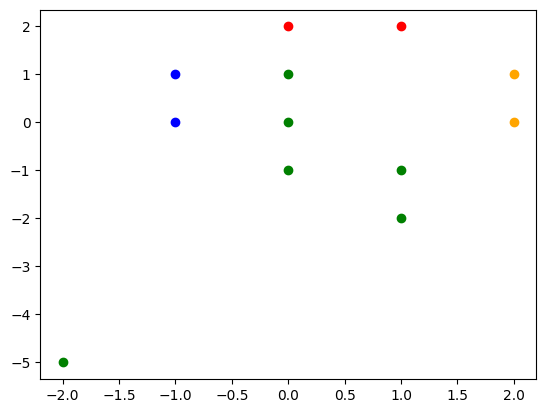

In [26]:
import matplotlib.pyplot as plt
print("You can see how our network classified this four points below:")
if Q[3] == 3:
    color = 'green'
if Q[2] == 2:
    color = 'orange'
if Q[1] == 1:
    color = 'red'
if Q[0] == 0:
    color = 'blue'

plt.scatter(P1[0],P1[1],c= color)
plt.scatter(P2[0],P2[1],c= color)
plt.scatter(P3[0],P3[1],c= color)
plt.scatter(P4[0],P4[1],c= color)

p = [[-1,1],[-1,0],[0,2],[1,2],[2,0],[2,1],[1,-1],[0,-1]]

for i in range(len(p)):
    if i<2:
        plt.scatter(p[i][0],p[i][1],c='blue')
    elif i<4:
        plt.scatter(p[i][0],p[i][1],c='red')
    elif i<6:
        plt.scatter(p[i][0],p[i][1],c='orange')
    else:
        plt.scatter(p[i][0],p[i][1],c='green')
        

Our network classification is completely right, but sometimes it can be different.


# 3_3

# 3_3_a

linearly seperable? 
As it is obvious in shape below this data are linearly seperable, because its diagram, which plotted in next cells, show
a daiagram which is linearly seperable. We can use two lines to seperate these 3 classes.

# 3_3_b

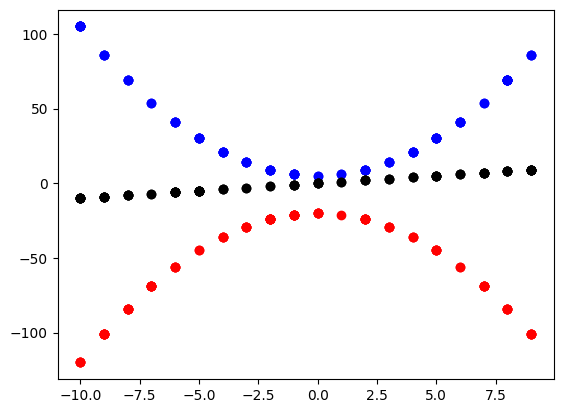

In [27]:

#Creating Training Set
t2 = []
t1 = []
p1 = []
p2 = []

for i in range(100):
    P1 = np.random.randint(-10,10)
    P2 = P1**2 + 5
    if P1**2 < P2-2 :
        t2.append(0)
        t1.append([1,0,0])
        
    p1.append(int(P1))
    p2.append(int(P2))
    
    plt.scatter(P1,P2,c='blue')
    
for i in range(100):
    P1 = np.random.randint(-10,10)
    P2 =  -(P1**2) - 20
    
    if P2+2< -(P1**2):
        t2.append(1)
        t1.append([0,1,0])
        
    p1.append(P1)
    p2.append(P2)
    plt.scatter(P1,P2,c='red')
    
    
for i in range(100):
    P1 = np.random.randint(-10,10)
    P2 =  P1
    
    if P2+2> -(P1**2) and  P1**2 > P2-2 :
        t2.append(2)
        t1.append([0,0,1])
            
    p1.append(P1)
    p2.append(P2)
    plt.scatter(P1,P2,c='black')
    
plt.show() 


In [28]:
x_train = []
for i in range(300):
    p = []
    p.append(p1[i])
    p.append(p2[i])
    x_train.append(p)
y_train = []
y_train = t1
x_train = np.array(x_train)

# 3_3_c

In [29]:
class Softmax:
    def __init__(self):
        pass
    def forward(self,inputs):
        neuron_output = np.exp(inputs-np.max(inputs,keepdims=True))
        self.output = neuron_output/np.sum(neuron_output,keepdims=True)

class Dense:
    def __init__(self,n_inputs,n_neurons):
        self.w = np.random.uniform(-1,1,size=(n_inputs,n_neurons))
        self.b = np.random.uniform(-1,1,size= n_neurons)
    
    def forward(self,inputs):
        self.output = np.dot(inputs,self.w)+self.b

Layer1 = Dense(2,3)
Act1 = Softmax()

c = 0
i = 0
epoch = 10

while i<epoch:
    L = []
    net_out = []
    
    for j in range(len(x_train)):
        
        Layer1.forward(x_train[j])
        Act1.forward(Layer1.output)
        
        for k in range(len(Act1.output)):
            if np.max(Act1.output) == Act1.output[k]:
                Act1.output[k] = 1
                net_out.append(k)
            else:
                Act1.output[k] = 0
                      
        k = []   
        
        e = y_train[j] - Act1.output
        e = np.array(e)

        k.append(x_train[j][0]*e)
        k.append(x_train[j][1]*e)

        Layer1.w = Layer1.w + k
        Layer1.b = Layer1.b + e
     
    print("weights in epoch:",i)
    print(Layer1.w)
    print("biases in epoch:",i)
    print(Layer1.b)

    c = 0

    for f in range(len(t2)):
        if net_out[f]==t2[f]:
            c = c+1
            
    print("Accuracy in epoch",i,'=',c/len(net_out)*100,'%\n')

    i = i+1

weights in epoch: 0
[[ -8.23987226  45.016572   -37.2762145 ]
 [  7.57885172 -45.77112029  38.89934567]]
biases in epoch: 0
[-18.36656165 -11.79923414  29.88953773]
Accuracy in epoch 0 = 89.0 %

weights in epoch: 1
[[-24.23987226  45.016572   -21.2762145 ]
 [ 25.57885172 -45.77112029  20.89934567]]
biases in epoch: 1
[-21.36656165 -11.79923414  32.88953773]
Accuracy in epoch 1 = 97.66666666666667 %

weights in epoch: 2
[[-29.23987226  45.016572   -16.2762145 ]
 [ 27.57885172 -45.77112029  18.89934567]]
biases in epoch: 2
[-24.36656165 -11.79923414  35.88953773]
Accuracy in epoch 2 = 98.33333333333333 %

weights in epoch: 3
[[-30.23987226  45.016572   -15.2762145 ]
 [ 33.57885172 -45.77112029  12.89934567]]
biases in epoch: 3
[-25.36656165 -11.79923414  36.88953773]
Accuracy in epoch 3 = 99.0 %

weights in epoch: 4
[[-30.23987226  45.016572   -15.2762145 ]
 [ 33.57885172 -45.77112029  12.89934567]]
biases in epoch: 4
[-25.36656165 -11.79923414  36.88953773]
Accuracy in epoch 4 = 100.0 %

# 3_3_d

In [30]:
print("final weights =")
print(Layer1.w)
print("final bias =")
print(Layer1.b)

final weights =
[[-30.23987226  45.016572   -15.2762145 ]
 [ 33.57885172 -45.77112029  12.89934567]]
final bias =
[-25.36656165 -11.79923414  36.88953773]


# 3_3_e

In this network there is no possibility as we just have 3 output neurons and one of them which is index of max value is the label of the class.
These indexes are finite and they can just be 0,1,2.

# 3_4_a

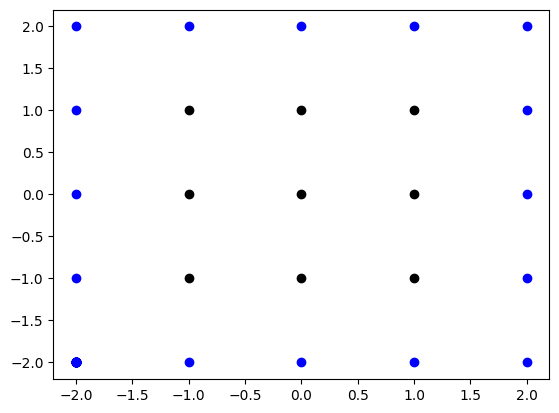

epoch 0 :
Accuracy = 48.0
epoch 1 :
Accuracy = 44.0
epoch 2 :
Accuracy = 36.0
epoch 3 :
Accuracy = 36.0
epoch 4 :
Accuracy = 36.0
epoch 5 :
Accuracy = 36.0
epoch 6 :
Accuracy = 36.0
epoch 7 :
Accuracy = 36.0
epoch 8 :
Accuracy = 36.0
epoch 9 :
Accuracy = 36.0
epoch 10 :
Accuracy = 36.0
epoch 11 :
Accuracy = 36.0
epoch 12 :
Accuracy = 36.0
epoch 13 :
Accuracy = 36.0
epoch 14 :
Accuracy = 36.0
epoch 15 :
Accuracy = 36.0
epoch 16 :
Accuracy = 36.0
epoch 17 :
Accuracy = 36.0
epoch 18 :
Accuracy = 36.0
epoch 19 :
Accuracy = 36.0
epoch 20 :
Accuracy = 36.0
epoch 21 :
Accuracy = 36.0
epoch 22 :
Accuracy = 36.0
epoch 23 :
Accuracy = 36.0
epoch 24 :
Accuracy = 36.0
epoch 25 :
Accuracy = 36.0
epoch 26 :
Accuracy = 36.0
epoch 27 :
Accuracy = 36.0
epoch 28 :
Accuracy = 36.0
epoch 29 :
Accuracy = 36.0
epoch 30 :
Accuracy = 36.0
epoch 31 :
Accuracy = 36.0
epoch 32 :
Accuracy = 36.0
epoch 33 :
Accuracy = 36.0
epoch 34 :
Accuracy = 36.0
epoch 35 :
Accuracy = 36.0
epoch 36 :
Accuracy = 36.0
epoch 37 :


In [31]:
#Creating Training Set
p = []
for i in range(5):
    for j in range(5):
        p.append([i-2,j-2])
        

#Creating Test Set
t = []
for i in range(5):
    for j in range(5):
        if i ==0 or i==4 or j==0 or j==4:
            t.append(0)
            plt.scatter(p[i],p[j], c= 'blue')
        else:
            t.append(1)
            plt.scatter(p[i],p[j], c= 'black')
            
plt.show()
            

            
class Dense:
    def __init__(self,n_inputs,n_neurons):
        self.w = np.random.uniform(0.1,0.1,size=(n_inputs,n_neurons))
        self.b =  np.random.uniform(0,0,size= n_neurons)
    
    def forward(self,inputs):
        self.output = np.dot(inputs,self.w)+self.b

class UnitStep:
    def __init__(self):
        pass
    def forward(self,inputs):
        for i in range(len(inputs)):
            if 0 <= inputs:
                self.output = 1
            else:
                self.output = 0

Layer1 = Dense(2,1)
Act1 = UnitStep()

epoch = 200
c = 0

for i in range(epoch):
    L = []
    for j in range(len(t)):
        k = [[],[]]
        
        Layer1.forward(p[j])
        Act1.forward(Layer1.output)
       
        e = t[j] - Act1.output
        e = np.array(e)
        
        k[0].append(e*p[j][0])
        k[1].append(e*p[j][1]) 

        Layer1.w = Layer1.w + k
        Layer1.b = Layer1.b + e
       
        L.append(Act1.output)

    c = 0
    L = np.array(L)
    for f in range(len(t)):
        if L[f]==t[f]:
            c = c+1
    print("epoch", i, ":")
    print("Accuracy =",c/25*100)    



this data can not be classified correctly because it is linearly inseperable

# 3_4_b

In [32]:
print("final weights")
print(Layer1.w)
print("final biases")
print(Layer1.b)       
print("Accuracy =",c/25*100)

final weights
[[-1.9]
 [ 0.1]]
final biases
[-1.]
Accuracy = 36.0


# 3_4_c

In [33]:
p1 = [0,3]
t1 = 0
p2 = [-1,0.5]
t2 = 1

Act1.forward(np.dot(p1,Layer1.w)+Layer1.b)
a1 = Act1.output
print("a1",a1,"t1",t1)

Act1.forward(np.dot(p2,Layer1.w)+Layer1.b)
a2 = Act1.output
print("a2",a2,"t2",t2)

a1 0 t1 0
a2 1 t2 1


# 3_5

In [34]:
#Creating Training Set
p = []
for i in range(5):
    for j in range(5):
        p.append([i-2,j-2])

#Creating Test Set
t = []
for i in range(5):
    for j in range(5):
        if i ==0 or i==5 or j==0 or j==5:
            t.append(0)
        else:
            t.append(1)
            
class Dense:
    def __init__(self,n_inputs,n_neurons):
        self.w = np.random.uniform(0.1,0.1,size=(n_inputs,n_neurons))
        self.b =  np.random.uniform(0,0,size= n_neurons)
    
    def forward(self,inputs):
        self.output = np.dot(inputs,self.w)+self.b

class UnitStep:
    def __init__(self):
        pass
    def forward(self,inputs):
        for i in range(len(inputs)):
            if 0 <= inputs:
                self.output = 1
            else:
                self.output = 0

Layer1 = Dense(2,1)
Act1 = UnitStep()

epoch = 200
c = 0
alpha = 0.01

for i in range(epoch):
    L = []
    for j in range(len(t)):
        k = [[],[]]
        
        Layer1.forward(p[j])
        Act1.forward(Layer1.output)
       
        e = t[j] - Act1.output
        e = np.array(e*alpha)
        
        k[0].append(e*p[j][0])
        k[1].append(e*p[j][1]) 

        Layer1.w = Layer1.w + k
        Layer1.b = Layer1.b + e
       
        L.append(Act1.output)
        
    

    c = 0
    L = np.array(L)
    for f in range(len(t)):
        if L[f]==t[f]:
            c = c+1
    print("epoch", i)
    print("Accuracy =",c/25*100)


epoch 0
Accuracy = 76.0
epoch 1
Accuracy = 76.0
epoch 2
Accuracy = 68.0
epoch 3
Accuracy = 72.0
epoch 4
Accuracy = 72.0
epoch 5
Accuracy = 76.0
epoch 6
Accuracy = 68.0
epoch 7
Accuracy = 64.0
epoch 8
Accuracy = 84.0
epoch 9
Accuracy = 72.0
epoch 10
Accuracy = 72.0
epoch 11
Accuracy = 68.0
epoch 12
Accuracy = 68.0
epoch 13
Accuracy = 68.0
epoch 14
Accuracy = 68.0
epoch 15
Accuracy = 68.0
epoch 16
Accuracy = 68.0
epoch 17
Accuracy = 68.0
epoch 18
Accuracy = 68.0
epoch 19
Accuracy = 68.0
epoch 20
Accuracy = 68.0
epoch 21
Accuracy = 68.0
epoch 22
Accuracy = 68.0
epoch 23
Accuracy = 68.0
epoch 24
Accuracy = 68.0
epoch 25
Accuracy = 68.0
epoch 26
Accuracy = 68.0
epoch 27
Accuracy = 68.0
epoch 28
Accuracy = 68.0
epoch 29
Accuracy = 68.0
epoch 30
Accuracy = 68.0
epoch 31
Accuracy = 68.0
epoch 32
Accuracy = 68.0
epoch 33
Accuracy = 68.0
epoch 34
Accuracy = 68.0
epoch 35
Accuracy = 68.0
epoch 36
Accuracy = 68.0
epoch 37
Accuracy = 68.0
epoch 38
Accuracy = 68.0
epoch 39
Accuracy = 68.0
epoch 40
A

learning trend in network is better after using learning rate. 

# changes in learning
In problem 3-4 the most accuracy is in epoch 0 and it is 48% after that there is no change in parameter and final accuracy for model is 36%
But in problem 3-5 the most accuracy is in epoch 9 and it is 84% after epoch 11 there is no update for parameters and dinal accuracy is 68%
In a nutshell using learning rate helped us to reach a better accuracy in lower number of epoches, however final accuracy is the same for both models(with and without learning_rate)

# 4_1

In [35]:
class Dense:
    def __init__(self,n_inputs,n_neurons):
        self.w = np.random.uniform(low=1.5, high=1.5, size=(n_inputs,n_neurons))
        self.b = np.random.uniform(low=1.5, high=1.5,size = n_neurons)
    
    def forward(self,inputs):
        self.output = np.dot(inputs,self.w)+self.b  

Layer1 = Dense(5,2)
Act1 = ReLU()

Layer2 = Dense(2,4)
Act2 = ReLU()

Layer3 = Dense(4,6)
Act3 = ReLU()

Layer4 = Dense(6,1)
Act4 = Sigmoid()

p = [[-1.2, 3, 0.8, -2, 1]]

Layer1.forward(p)
Act1.forward(Layer1.output)

Layer2.forward(Act1.output)
Act2.forward(Layer2.output)

Layer3.forward(Act2.output)
Act3.forward(Layer3.output)

Layer4.forward(Act3.output)
Act4.forward(Layer4.output)

print(Act4.output)

class Binary_Cross_Entropy_loss:
    def __init__(self):
        pass
    def forward(self,y_true,y_predict):
        y_predict = np.clip(y_predict,0.000001,0.999999)
        return np.mean(-(y_true*np.log(y_predict)+
                        (1-y_true)*np.log(1-y_predict)))

y_predict = Act4.output

y_true = np.array([0])               #true lable of 3 samples

loss = Binary_Cross_Entropy_loss()
loss.forward(y_true,y_predict)

[[1.]]


13.815510557935518

# 4_2

In [36]:
class Dense:
    def __init__(self,n_inputs,n_neurons):
        self.w = np.random.normal(0, 1, size=(n_inputs,n_neurons))
        self.b =  np.random.normal(0, 1, size= n_neurons)
    
    def forward(self,inputs):
        self.output = np.dot(inputs,self.w)+self.b

loss = Binary_Cross_Entropy_loss()
        
Layer1 = Dense(3,2)
Layer2 = Dense(2,1)
Act2 = Sigmoid()

p1 = [[0, 0, 0]]
p2 = [[-1, 1, 2]]
p3 = [[2, 0, -1]]
p4 = [[-1, -1, 1]]

for i in range(4):
    if i==0:
        print("for activation function1 relu:")
        Act1 = ReLU()
        
    if i==1:
        print("for activation function1 Tanh:")
        Act1 = Tanh()
        
    if i==2:
        print("for activation function1 Sigmoid:")
        Act1 = Sigmoid()
        
    if i==3:
        print("for activation function1 Linear:")
        Act1 = Linear()
        

    Layer1.forward(p1)
    Act1.forward(Layer1.output)
    Layer2.forward(Act1.output)
    Act2.forward(Layer2.output)
    print("network outcome for p1:",Act2.output)
    if Act2.output>= 0.5:
        y_predict = 1
        print("p1 belongs to class 1")
    else:
        y_predict = 0
        print("p1 belongs to class 0")
    print("loss:",loss.forward(0,y_predict))        
          
    Layer1.forward(p2)
    Act1.forward(Layer1.output)
    Layer2.forward(Act1.output)
    Act2.forward(Layer2.output)
    print("network outcome for p2:",Act2.output)
    if Act2.output>= 0.5:
        y_predict = 1
        print("p2 belongs to class 1")
    else:
        y_predict = 0
        print("p2 belongs to class 0")
    print("loss:",loss.forward(0,y_predict))
    
    Layer1.forward(p3)
    Act1.forward(Layer1.output)
    Layer2.forward(Act1.output)
    Act2.forward(Layer2.output)
    print("network outcome for p3:",Act2.output)
    if Act2.output>= 0.5:
        y_predict = 1
        print("p3 belongs to class 1")
    else:
        y_predict = 0
        print("p3 belongs to class 0")
    print("loss:",loss.forward(1,y_predict)) 
    
    Layer1.forward(p4)
    Act1.forward(Layer1.output)
    Layer2.forward(Act1.output)
    Act2.forward(Layer2.output)
    print("network outcome for p4:",Act2.output)
    if Act2.output>= 0.5:
        y_predict = 1
        print("p4 belongs to class 1")
    else:
        y_predict = 0
        print("p4 belongs to class 0")
    print("loss:",loss.forward(1,y_predict)) 

for activation function1 relu:
network outcome for p1: [[0.63140593]]
p1 belongs to class 1
loss: 13.815510557935518
network outcome for p2: [[0.68909382]]
p2 belongs to class 1
loss: 13.815510557935518
network outcome for p3: [[0.56474278]]
p3 belongs to class 1
loss: 1.000000500029089e-06
network outcome for p4: [[0.68909382]]
p4 belongs to class 1
loss: 1.000000500029089e-06
for activation function1 Tanh:
network outcome for p1: [[0.72422014]]
p1 belongs to class 1
loss: 13.815510557935518
network outcome for p2: [[0.79010127]]
p2 belongs to class 1
loss: 13.815510557935518
network outcome for p3: [[0.67853388]]
p3 belongs to class 1
loss: 1.000000500029089e-06
network outcome for p4: [[0.77621453]]
p4 belongs to class 1
loss: 1.000000500029089e-06
for activation function1 Sigmoid:
network outcome for p1: [[0.61604792]]
p1 belongs to class 1
loss: 13.815510557935518
network outcome for p2: [[0.65278961]]
p2 belongs to class 1
loss: 13.815510557935518
network outcome for p3: [[0.5900

# 4_3

In [37]:

class Dense:
    def __init__(self,n_inputs,n_neurons):
        self.w = np.random.uniform(-4, 4, size=(n_inputs,n_neurons))
        self.b =  np.random.uniform(-4, 4, size= n_neurons)
    
    def forward(self,inputs):
        self.output = np.dot(inputs,self.w)+self.b

class Categorical_Cross_Entropy_loss:
    def __init__(self):
        pass
    def forward(self,softmax_output,class_label):
        softmax_output = np.clip(softmax_output,0.000001,0.999999)
        cc = np.sum(softmax_output*class_label,axis=1)
        return np.mean(-np.log(cc))
        
Layer1 = Dense(2,4)
Act1 = ReLU()

Layer2 = Dense(4,3)
Act2 = Softmax()

p11 = [[-1, 1]]
p12 = [[-1, 0]]
p21 = [[0, 2]]
p22 = [[1, 2]]
p31 = [[2, 0]]
p32 = [[2, 1]]


Layer1.forward(p11)
Act1.forward(Layer1.output)
Layer2.forward(Act1.output)
Act2.forward(Layer2.output)
print("network outcome for p11:",Act2.output)
loss = Categorical_Cross_Entropy_loss()
print("loss:",loss.forward(Act2.output,0))

Layer1.forward(p12)
Act1.forward(Layer1.output)
Layer2.forward(Act1.output)
Act2.forward(Layer2.output)
print("network outcome for p12:",Act2.output)
loss = Categorical_Cross_Entropy_loss()
print("loss:",loss.forward(Act2.output,0))

Layer1.forward(p21)
Act1.forward(Layer1.output)
Layer2.forward(Act1.output)
Act2.forward(Layer2.output)
print("network outcome for p21:",Act2.output)
loss = Categorical_Cross_Entropy_loss()
print("loss:",loss.forward(Act2.output,0))

Layer1.forward(p22)
Act1.forward(Layer1.output)
Layer2.forward(Act1.output)
Act2.forward(Layer2.output)
print("network outcome for p22:",Act2.output)
loss = Categorical_Cross_Entropy_loss()
print("loss:",loss.forward(Act2.output,0))


Layer1.forward(p31)
Act1.forward(Layer1.output)
Layer2.forward(Act1.output)
Act2.forward(Layer2.output)
print("network outcome for p31:",Act2.output)
loss = Categorical_Cross_Entropy_loss()
print("loss:",loss.forward(Act2.output,0))

Layer1.forward(p32)
Act1.forward(Layer1.output)
Layer2.forward(Act1.output)
Act2.forward(Layer2.output)
print("network outcome for p32:",Act2.output)
loss = Categorical_Cross_Entropy_loss()
print("loss:",loss.forward(Act2.output,0))

network outcome for p11: [[0.00851233 0.00570989 0.98577778]]
loss: inf
network outcome for p12: [[9.49691146e-04 5.05101154e-03 9.93999297e-01]]
loss: inf
network outcome for p21: [[0.12138151 0.09725501 0.78136348]]
loss: inf
network outcome for p22: [[0.02670559 0.02479806 0.94849635]]
loss: inf
network outcome for p31: [[7.08039923e-20 1.00000000e+00 6.07319323e-12]]
loss: inf
network outcome for p32: [[2.17078796e-12 9.99999495e-01 5.05010335e-07]]
loss: inf


C:\Users\Ansar9811291\AppData\Local\Temp\ipykernel_12256\3167979371.py:15: RuntimeWarning: divide by zero encountered in log
  return np.mean(-np.log(cc))


# 4_4

In [38]:

class Dense:
    def __init__(self,n_inputs,n_neurons):
        self.w = np.random.uniform(1,1,size=(n_inputs,n_neurons))
        self.b =  np.random.uniform(1,1,size= n_neurons)
    
    def forward(self,inputs):
        self.output = np.dot(inputs,self.w)+self.b

class Dense1:
    def __init__(self,n_inputs,n_neurons):
        self.w = np.random.uniform(-1,-1,size=(n_inputs,n_neurons))
        self.b =  np.random.uniform(-1,-1,size= n_neurons)
    
    def forward(self,inputs):
        self.output = np.dot(inputs,self.w)+self.b


class Mean_Square_Error_loss:
    def __init__(self):
        pass
    def forward(self,y_true,y_predict):
        return np.mean((y_true-y_predict)**2,axis = -1)
        
Layer1 = Dense(3,2)
Act1 = ReLU()

Layer2 = Dense1(2,1)
Act2 = ReLU()


p1 = [0,1,2]
t1 = 0.4
Layer1.forward(p1)
Act1.forward(Layer1.output)

Layer2.forward(Act1.output)
Act2.forward(Layer2.output)

loss = Mean_Square_Error_loss()
print("loss for p1 =", loss.forward(t1,Act2.output))
      
    
p2 = [-4,3,-3]
t2 = -1.6
Layer1.forward(p2)
Act1.forward(Layer1.output)

Layer2.forward(Act1.output)
Act2.forward(Layer2.output)

loss = Mean_Square_Error_loss()
print("loss for p2 =", loss.forward(t2,Act2.output))

p3 = [1.7,-1,0]
t3 = 3.7
Layer1.forward(p3)
Act1.forward(Layer1.output)

Layer2.forward(Act1.output)
Act2.forward(Layer2.output)

loss = Mean_Square_Error_loss()
print("loss for p3 =", loss.forward(t3,Act2.output))

p4 = [-2,-3,1.5]
t4 = -0.9
Layer1.forward(p4)
Act1.forward(Layer1.output)

Layer2.forward(Act1.output)
Act2.forward(Layer2.output)

loss = Mean_Square_Error_loss()
print("loss for p4 =", loss.forward(t4,Act2.output))

loss for p1 = 0.16000000000000003
loss for p2 = 2.5600000000000005
loss for p3 = 13.690000000000001
loss for p4 = 0.81
